# Regresión Lineal Regularizada (Ridge & Lasso)

## Contexto del Proyecto

**Datos socio demográficos y de recursos de salud a nivel de condado de EE. UU. (2018-2019)**

Se han recopilado datos socio demográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.


# 1.0 Importamos las librerias

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
import shap
import lightgbm as lgb
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1.1 Importamos los datos

In [47]:
df = pd.read_csv('/workspaces/carlos060495-intro-ml/data/raw/demographic_health_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [48]:
df.shape

(3140, 108)

# 2.1 Identificar y eliminar columnas con valores contantes

In [49]:
unicos = df.nunique()
df[unicos[unicos==1].index]

""
0
1
2
3
4
...
3135
3136
3137
3138


# 2.2 Eliminamos filas y columnas duplicadas

In [50]:
# Comprobar duplicados
df.duplicated().sum()

np.int64(0)

In [51]:
df.T.duplicated().sum()

np.int64(2)

In [52]:
columnas_duplicadas = df.T.duplicated(keep=False)
print(f"Total de columnas involucradas en duplicación: {columnas_duplicadas.sum()}")
print(f"Número de columnas que son copias: {df.T.duplicated().sum()}")
print("\nNombres de todas las columnas duplicadas:")
print(columnas_duplicadas[columnas_duplicadas].index.tolist())

Total de columnas involucradas en duplicación: 4
Número de columnas que son copias: 2

Nombres de todas las columnas duplicadas:
['TOT_POP', 'POP_ESTIMATE_2018', 'MEDHHINC_2018', 'Median_Household_Income_2018']


In [53]:
df.drop(columns=["TOT_POP", "MEDHHINC_2018"], inplace=True)

In [54]:
df.shape

(3140, 106)

# 2.3 Eliminacion columnas redundantes

In [55]:
# Identificar tipos de datos de las columnas
print("Tipos de datos en el dataframe:")
print(df.dtypes.value_counts())
print("\n" + "="*50)

# Separar columnas numéricas y categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nColumnas numéricas: {len(numeric_cols)}")
print(f"Columnas categóricas: {len(categorical_cols)}")

if len(categorical_cols) > 0:
    print("\nColumnas categóricas encontradas:")
    for col in categorical_cols:
        print(f"  - {col}: {df[col].nunique()} valores únicos")
else:
    print("\nNo se encontraron columnas categóricas.")

Tipos de datos en el dataframe:
float64    61
int64      43
object      2
Name: count, dtype: int64


Columnas numéricas: 104
Columnas categóricas: 2

Columnas categóricas encontradas:
  - COUNTY_NAME: 1841 valores únicos
  - STATE_NAME: 51 valores únicos
  - COUNTY_NAME: 1841 valores únicos
  - STATE_NAME: 51 valores únicos


In [56]:
# Analizar las columnas para identificar relaciones redundantes/derivables
print("Análisis de columnas redundantes y derivables:\n")

# 0. Identificar columnas categóricas redundantes (nombres vs códigos)
categorical_redundant = []
if 'COUNTY_NAME' in df.columns and 'fips' in df.columns:
    categorical_redundant.append('COUNTY_NAME')
if 'STATE_NAME' in df.columns and 'STATE_FIPS' in df.columns:
    categorical_redundant.append('STATE_NAME')

print(f"0. COLUMNAS CATEGÓRICAS REDUNDANTES:")
print(f"   - {categorical_redundant}")
print(f"   → Decisión: Eliminar nombres, mantener códigos FIPS (numéricos)\n")

# 1. Identificar columnas de población por edad (valores absolutos vs porcentajes)
age_columns = [col for col in df.columns if any(x in col for x in ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])]
age_absolute = [col for col in age_columns if 'y/o %' not in col and 'Aged' not in col and 'Percent' not in col]
age_percentage = [col for col in age_columns if 'y/o %' in col or 'Percent' in col]

print(f"1. POBLACIÓN POR EDAD:")
print(f"   - Columnas absolutas: {len(age_absolute)}")
print(f"   - Columnas porcentajes: {len(age_percentage)}")
print(f"   → Decisión: Mantener porcentajes, eliminar absolutos (se pueden derivar del total)\n")

# 2. Identificar columnas de población por raza (valores absolutos vs porcentajes)
race_absolute = [col for col in df.columns if col.endswith('-alone pop') or 'Two or more races pop' in col]
race_percentage = [col for col in df.columns if col.startswith('% ') and 'alone' in col or '% Two or more races' in col]

print(f"2. POBLACIÓN POR RAZA:")
print(f"   - Columnas absolutas: {len(race_absolute)}")
print(f"   - Columnas porcentajes: {len(race_percentage)}")
print(f"   → Decisión: Mantener porcentajes, eliminar absolutos (se pueden derivar del total)\n")

# 3. Identificar columnas de educación (valores absolutos vs porcentajes)
edu_absolute = [col for col in df.columns if 'diploma 2014-18' in col and 'Percent' not in col]
edu_percentage = [col for col in df.columns if 'Percent of adults' in col and 'diploma' in col]

print(f"3. EDUCACIÓN:")
print(f"   - Columnas absolutas: {len(edu_absolute)}")
print(f"   - Columnas porcentajes: {len(edu_percentage)}")
print(f"   → Decisión: Mantener porcentajes, eliminar absolutos (se pueden derivar del total)\n")

# 4. Identificar columnas de prevalencia vs número de personas con condiciones
condition_prevalence = [col for col in df.columns if '_prevalence' in col]
condition_number = [col for col in df.columns if '_number' in col]
condition_ci = [col for col in df.columns if 'CI' in col and any(cond in col for cond in ['anycondition', 'Obesity', 'Heart disease', 'COPD', 'diabetes', 'CKD'])]

print(f"4. CONDICIONES DE SALUD:")
print(f"   - Prevalencia (tasas): {len(condition_prevalence)}")
print(f"   - Números absolutos: {len(condition_number)}")
print(f"   - Intervalos de confianza: {len(condition_ci)}")
print(f"   → Decisión: Mantener prevalencia, eliminar números absolutos y CIs\n")

# 5. Identificar columnas de población redundantes adicionales
population_redundant = []
if 'Total Population' in df.columns and 'POP_ESTIMATE_2018' in df.columns:
    population_redundant.append('Total Population')
if 'Population Aged 60+' in df.columns and 'Percent of Population Aged 60+' in df.columns:
    population_redundant.append('Population Aged 60+')

print(f"5. POBLACIÓN REDUNDANTE:")
print(f"   - {population_redundant}")
print(f"   → Decisión: Eliminar valores absolutos, mantener porcentajes o la versión ya existente (POP_ESTIMATE_2018)\n")

# 6. Resumen de columnas a eliminar
columns_to_drop = categorical_redundant + age_absolute + race_absolute + edu_absolute + condition_number + condition_ci + population_redundant

print(f"\n{'='*60}")
print(f"RESUMEN:")
print(f"Total de columnas redundantes identificadas: {len(columns_to_drop)}")
print(f"\nColumnas que se pueden eliminar sin pérdida de información:")
for i, col in enumerate(columns_to_drop, 1):
    print(f"{i:2d}. {col}")

Análisis de columnas redundantes y derivables:

0. COLUMNAS CATEGÓRICAS REDUNDANTES:
   - ['COUNTY_NAME', 'STATE_NAME']
   → Decisión: Eliminar nombres, mantener códigos FIPS (numéricos)

1. POBLACIÓN POR EDAD:
   - Columnas absolutas: 8
   - Columnas porcentajes: 9
   → Decisión: Mantener porcentajes, eliminar absolutos (se pueden derivar del total)

2. POBLACIÓN POR RAZA:
   - Columnas absolutas: 6
   - Columnas porcentajes: 6
   → Decisión: Mantener porcentajes, eliminar absolutos (se pueden derivar del total)

3. EDUCACIÓN:
   - Columnas absolutas: 1
   - Columnas porcentajes: 2
   → Decisión: Mantener porcentajes, eliminar absolutos (se pueden derivar del total)

4. CONDICIONES DE SALUD:
   - Prevalencia (tasas): 6
   - Números absolutos: 6
   - Intervalos de confianza: 12
   → Decisión: Mantener prevalencia, eliminar números absolutos y CIs

5. POBLACIÓN REDUNDANTE:
   - ['Total Population', 'Population Aged 60+']
   → Decisión: Eliminar valores absolutos, mantener porcentajes o 

### Justificación de la Eliminación de Columnas Redundantes

1. **Columnas categóricas con equivalentes numéricos**: `COUNTY_NAME` y `STATE_NAME` son redundantes porque los códigos FIPS (`fips`, `STATE_FIPS`, `CNTY_FIPS`) ya identifican cada condado de forma única. Los códigos numéricos son más eficientes para el modelo.

2. **Valores absolutos cuando existen porcentajes**: Las columnas de población por edad, raza y educación en valores absolutos se pueden calcular multiplicando los porcentajes por la población total. Mantener ambas genera **alta correlación** → el modelo se confunde sobre cuál es importante. 

3. **Números absolutos de condiciones de salud**: Los números absolutos de personas con condiciones (`*_number`) se calculan multiplicando la prevalencia (`*_prevalence`) por la población.

4. **Intervalos de confianza (Lower y Upper 95% CI)**: Estos intervalos solo indican "qué tan seguros estamos" de la prevalencia, pero NO son características reales del condado. Están **extremadamente correlacionados** con la prevalencia (si la prevalencia es alta, los intervalos también; si es baja, son bajos). 
   - **Analogía**: Si la temperatura es 25°C ±2°C, para predecir ventas de helado solo necesitas 25°C, no el margen de error.
   - **Resultado**: Eliminamos ambos límites porque están correlacionados con la prevalencia Y entre sí, generando ruido sin aportar información útil.

5. **Columnas de población redundantes adicionales**: `Total Population` duplica `POP_ESTIMATE_2018` (ya tenemos esta información), y `Population Aged 60+` duplica `Percent of Population Aged 60+` (el porcentaje es más útil para comparar entre condados de diferentes tamaños).

**Beneficio final**: Modelo más limpio, sin ruido, sin variables confusas, y con toda la información relevante preservada.

In [57]:
# Eliminar columnas redundantes
print(f"Forma del dataframe ANTES de eliminar columnas redundantes: {df.shape}")
df.drop(columns=columns_to_drop, inplace=True)
print(f"Forma del dataframe DESPUÉS de eliminar columnas redundantes: {df.shape}")
print(f"\nColumnas eliminadas: {len(columns_to_drop)}")

Forma del dataframe ANTES de eliminar columnas redundantes: (3140, 106)
Forma del dataframe DESPUÉS de eliminar columnas redundantes: (3140, 69)

Columnas eliminadas: 37


# 2.4 Eliminar columnas que produzcan un data leakage

In [58]:
# Identificar columnas que pueden causar data leakage
print("Análisis de columnas que pueden causar DATA LEAKAGE:\n")

# Variable objetivo
target = 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)'
print(f"Variable objetivo: {target}\n")

# 1. Identificadores únicos a nivel de condado (demasiado específicos)
identifiers_county = ['fips', 'CNTY_FIPS']
identifiers_county_present = [col for col in identifiers_county if col in df.columns]

print(f"1. IDENTIFICADORES A NIVEL DE CONDADO:")
print(f"   - {identifiers_county_present}")
print(f"   → Decisión: Eliminar (memorizan condados específicos)\n")

# Mantener STATE_FIPS para capturar efectos regionales/estatales
if 'STATE_FIPS' in df.columns:
    print(f"   NOTA: Mantenemos 'STATE_FIPS' para capturar diferencias entre estados")

# 2. Otras métricas de recursos médicos (relacionadas directamente con el objetivo)
medical_resources = [col for col in df.columns if any(keyword in col.lower() for keyword in 
                     ['physician', 'doctor', 'nurse', 'hospital', 'surgeon', 'icu', 'bed', 
                      'patient care', 'primary care', 'specialist', 'medicine', 'medical'])]

# Excluir el target de esta lista
medical_resources = [col for col in medical_resources if col != target]

print(f"2. OTRAS MÉTRICAS DE RECURSOS MÉDICOS:")
print(f"   Total encontradas: {len(medical_resources)}")
if len(medical_resources) > 0:
    print(f"   Columnas:")
    for col in medical_resources:
        print(f"      - {col}")
print(f"   → Decisión: Eliminar (están directamente relacionadas con el objetivo)\n")

# Columnas a eliminar por data leakage
leakage_columns = identifiers_county_present + medical_resources

print(f"\n{'='*60}")
print(f"RESUMEN - COLUMNAS CON DATA LEAKAGE:")
print(f"Total de columnas identificadas: {len(leakage_columns)}")
print(f"\nColumnas que se eliminarán para evitar data leakage:")
for i, col in enumerate(leakage_columns, 1):
    print(f"{i:2d}. {col}")

Análisis de columnas que pueden causar DATA LEAKAGE:

Variable objetivo: Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)

1. IDENTIFICADORES A NIVEL DE CONDADO:
   - ['fips', 'CNTY_FIPS']
   → Decisión: Eliminar (memorizan condados específicos)

   NOTA: Mantenemos 'STATE_FIPS' para capturar diferencias entre estados
2. OTRAS MÉTRICAS DE RECURSOS MÉDICOS:
   Total encontradas: 12
   Columnas:
      - Active Physicians per 100000 Population 2018 (AAMC)
      - Active Primary Care Physicians per 100000 Population 2018 (AAMC)
      - Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)
      - Active General Surgeons per 100000 Population 2018 (AAMC)
      - Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)
      - Total nurse practitioners (2019)
      - Total physician assistants (2019)
      - Total Hospitals (2019)
      - Internal Medicine Primary Care (2019)
      - Family Medicine/General Practice Primary Care (20

### Justificación de la Eliminación por Data Leakage

1. **Identificadores a nivel de condado** (`fips`, `CNTY_FIPS`): Estos códigos permiten al modelo "memorizar" cada condado específico en lugar de aprender patrones generales. 
   - **Mantenemos**: `STATE_FIPS` porque captura efectos regionales legítimos (diferencias en políticas estatales, economía regional, acceso a educación médica por estado, etc.) que SÍ son características sociodemográficas relevantes.
   - **Eliminamos**: Identificadores a nivel de condado porque son demasiado específicos.

2. **Otras métricas de recursos médicos**: Columnas como número de médicos especialistas, enfermeras, hospitales, camas UCI, etc., están **directamente relacionadas** con nuestro objetivo (médicos de atención al paciente). Si un condado tiene muchos cirujanos, probablemente tenga muchos médicos de atención al paciente también.


In [59]:
# Eliminar columnas con data leakage
print(f"Forma del dataframe ANTES de eliminar columnas con leakage: {df.shape}")
df.drop(columns=leakage_columns, inplace=True)
print(f"Forma del dataframe DESPUÉS de eliminar columnas con leakage: {df.shape}")
print(f"\nColumnas eliminadas: {len(leakage_columns)}")
print(f"\nColumnas restantes: {df.shape[1]}")

Forma del dataframe ANTES de eliminar columnas con leakage: (3140, 69)
Forma del dataframe DESPUÉS de eliminar columnas con leakage: (3140, 55)

Columnas eliminadas: 14

Columnas restantes: 55


# 3.1 Valores faltantes

In [60]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

Series([], dtype: float64)

<Axes: >

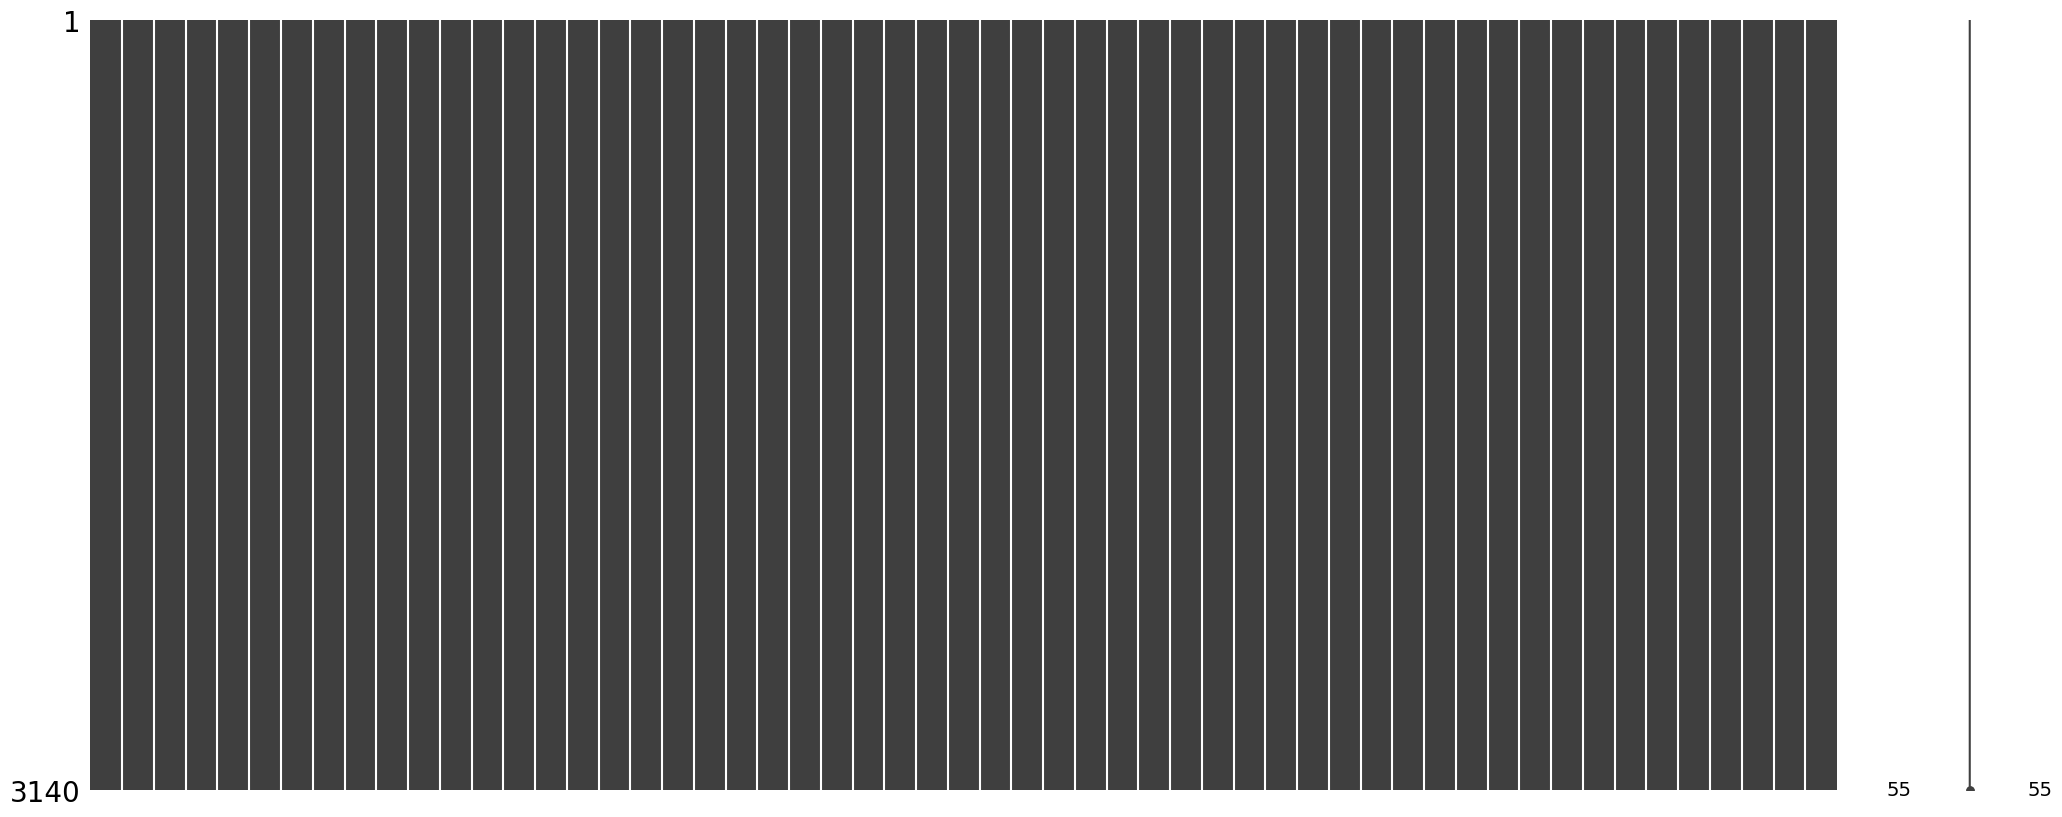

In [61]:
msno.matrix(df)

No tenemos valores faltantes por lo que procedemos al siguiente paso

# 4.1 Train test split

In [62]:
X = df.drop('Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',axis=1)
y = df['Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Análisis y tratamiento de outliers

In [64]:
# Análisis descriptivo de todas las características numéricas
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0-9 y/o % of total pop,2512.0,11.880931,2.117196,0.000000,10.602231,11.796810,12.938572,2.498298e+01
19-Oct,2512.0,13998.794188,45549.610187,0.000000,1409.750000,3364.500000,9123.250000,1.239139e+06
10-19 y/o % of total pop,2512.0,12.715698,1.791751,0.000000,11.693611,12.707349,13.663152,2.330437e+01
20-29 y/o % of total pop,2512.0,12.310367,3.110890,0.000000,10.503883,11.785135,13.198914,3.465124e+01
30-39 y/o % of total pop,2512.0,11.769819,1.720091,6.092789,10.692044,11.579366,12.675179,2.222513e+01
40-49 y/o % of total pop,2512.0,11.567808,1.339101,2.631579,10.717482,11.628359,12.392594,1.903648e+01
50-59 y/o % of total pop,2512.0,13.519299,1.485312,6.102350,12.694544,13.627413,14.430568,2.045455e+01
60-69 y/o % of total pop,2512.0,13.154158,2.494505,5.362950,11.619869,13.008696,14.457951,2.727273e+01
70-79 y/o % of total pop,2512.0,8.364850,2.173953,2.603323,7.008794,8.216729,9.435445,3.132796e+01
80+ y/o % of total pop,2512.0,4.717071,1.525961,0.000000,3.738648,4.564662,5.443597,2.272727e+01


In [65]:
# Calcular IQR y detectar outliers para cada columna numérica
outlier_counts = {}

for col in X_train.columns:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = X_train[(X_train[col] < lower_bound) | (X_train[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Mostrar las columnas con más outliers
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Num_Outliers'])
outlier_df = outlier_df.sort_values('Num_Outliers', ascending=False)
print("Columnas con más outliers (método IQR):\n")
print(outlier_df.head(15))

Columnas con más outliers (método IQR):

                                            Num_Outliers
N_POP_CHG_2018                                       441
Bachelor's degree or higher 2014-18                  385
Civilian_labor_force_2018                            360
Employed_2018                                        360
county_pop2018_18 and older                          344
19-Oct                                               342
POP_ESTIMATE_2018                                    342
Some college or associate's degree 2014-18           337
Unemployed_2018                                      333
% Black-alone                                        315
% NA/AI-alone                                        307
% Asian-alone                                        300
POVALL_2018                                          297
High school diploma only 2014-18                     292
GQ_ESTIMATES_2018                                    287


**Decisión sobre outliers:**

Para modelos de regresión lineal con regularización (Ridge y Lasso), **mantendremos los outliers** porque:

1. **Datos reales**: Los outliers representan condados reales con características únicas (ej: condados muy poblados como Los Angeles, o muy rurales)
2. **Escalado**: El StandardScaler reduce el impacto de valores extremos
3. **Regularización**: Ridge y Lasso son robustos y penalizan coeficientes extremos
4. **Información valiosa**: Los outliers pueden contener información importante sobre la relación entre variables

Si los modelos tuvieran bajo rendimiento, podríamos considerar técnicas como transformaciones logarítmicas o robust scaling.

# 4.3 Selección de características

## 4.3.1 Método 1: Feature importance de RF

In [66]:
# Entrenamiento de RF
model = RandomForestRegressor(random_state=42,n_jobs=-1).fit(X_train, y_train)

In [67]:
# Importancia de características
importances = model.feature_importances_/model.feature_importances_.sum()*100

# Convertir a DataFrame
df_rf_imp = pd.DataFrame({'feature': X_train.columns,'rf_importance': importances}).sort_values(by='rf_importance', ascending=False)

# Calculamos la importancia acumulada
df_rf_imp['rf_importance_acum'] = df_rf_imp['rf_importance'].cumsum()

In [68]:
df_rf_imp

,feature,rf_importance,rf_importance_acum
45,STATE_FIPS,24.521696,24.521696
48,Obesity_prevalence,11.156510,35.678205
6,50-59 y/o % of total pop,6.693181,42.371386
41,Unemployment_rate_2018,4.549178,46.920564
30,Percent of adults completing some college or a...,4.290078,51.210642
28,Percent of adults with less than a high school...,3.989412,55.200054
11,% Black-alone,3.609779,58.809833
12,% NA/AI-alone,2.959216,61.769050
43,Med_HH_Income_Percent_of_State_Total_2018,2.232588,64.001638
51,diabetes_prevalence,2.127146,66.128784


## 4.3.2 Método 2: Permutation/Shuffle importance

In [69]:
# Para esta técnica y la de shap se necesita conjunto de validación
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Ajustamos el modelo
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train1, y_train1)

In [70]:
# Realizamos 10 permutaciones por cada característica
perm = permutation_importance(model_xgb, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1, scoring='neg_mean_absolute_percentage_error')

In [71]:
df_perm_imp = pd.DataFrame({'feature': X_train.columns, 'perm_imp': perm.importances_mean*100}).sort_values('perm_imp', ascending=False)
df_perm_imp

,feature,perm_imp
45,STATE_FIPS,4.679247
43,Med_HH_Income_Percent_of_State_Total_2018,1.507760
51,diabetes_prevalence,0.900586
48,Obesity_prevalence,0.858127
36,CI90LBINC_2018,0.746686
41,Unemployment_rate_2018,0.617012
28,Percent of adults with less than a high school...,0.530152
12,% NA/AI-alone,0.498336
15,% Two or more races,0.452902
47,anycondition_prevalence,0.429634


## 4.3.3 Método 3: SHAP

In [72]:
# Ajustamos el modelo
model_lgbm = lgb.LGBMRegressor(random_state=42, n_jobs=-1).fit(X_train1, y_train1)

explainer = shap.Explainer(model_lgbm, X_val)   # usa el mismo X_val
shap_vals = explainer(X_val).values

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11864
[LightGBM] [Info] Number of data points in the train set: 2009, number of used features: 54
[LightGBM] [Info] Start training from score 226.091191


In [73]:
imp_shap = np.abs(shap_vals).mean(axis=0)
imp_shap_pct = imp_shap/imp_shap.sum()*100
df_shap_imp = pd.DataFrame({"feature": X_val.columns, "shap_imp": imp_shap_pct}).sort_values('shap_imp', ascending=False)
df_shap_imp

,feature,shap_imp
45,STATE_FIPS,19.092613
43,Med_HH_Income_Percent_of_State_Total_2018,8.086345
48,Obesity_prevalence,6.642429
6,50-59 y/o % of total pop,5.509053
41,Unemployment_rate_2018,4.407391
30,Percent of adults completing some college or a...,4.097596
51,diabetes_prevalence,3.689053
25,High school diploma only 2014-18,3.438451
28,Percent of adults with less than a high school...,3.324152
47,anycondition_prevalence,2.861781


## 4.3.4 Unión 3 métodos

In [74]:
df_importances = (
    df_rf_imp
    .merge(df_perm_imp, on='feature', how='outer')
    .merge(df_shap_imp, on='feature', how='outer')
).sort_values('rf_importance', ascending=False)
df_importances

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
46,STATE_FIPS,24.521696,24.521696,4.679247,19.092613
29,Obesity_prevalence,11.156510,35.678205,0.858127,6.642429
12,50-59 y/o % of total pop,6.693181,42.371386,0.318659,5.509053
49,Unemployment_rate_2018,4.549178,46.920564,0.617012,4.407391
36,Percent of adults completing some college or a...,4.290078,51.210642,0.227268,4.097596
39,Percent of adults with less than a high school...,3.989412,55.200054,0.530152,3.324152
1,% Black-alone,3.609779,58.809833,0.228174,1.994686
3,% NA/AI-alone,2.959216,61.769050,0.498336,2.537152
26,Med_HH_Income_Percent_of_State_Total_2018,2.232588,64.001638,1.507760,8.086345
53,diabetes_prevalence,2.127146,66.128784,0.900586,3.689053


In [75]:
# Selección basada en importancia acumulada (80%)
threshold = 95
df_filt = df_rf_imp[df_rf_imp['rf_importance_acum'] <= threshold].copy()

print(f"Features seleccionadas: {len(df_filt)}")
print(f"Importancia acumulada: {df_filt['rf_importance'].sum():.1f}%")
print(f"\nTop 10 features:")
print(df_filt[['feature', 'rf_importance', 'rf_importance_acum']].head(10))

Features seleccionadas: 35
Importancia acumulada: 94.5%

Top 10 features:
                                              feature  rf_importance  \
45                                         STATE_FIPS      24.521696   
48                                 Obesity_prevalence      11.156510   
6                            50-59 y/o % of total pop       6.693181   
41                             Unemployment_rate_2018       4.549178   
30  Percent of adults completing some college or a...       4.290078   
28  Percent of adults with less than a high school...       3.989412   
11                                      % Black-alone       3.609779   
12                                      % NA/AI-alone       2.959216   
43          Med_HH_Income_Percent_of_State_Total_2018       2.232588   
51                                diabetes_prevalence       2.127146   

    rf_importance_acum  
45           24.521696  
48           35.678205  
6            42.371386  
41           46.920564  
30      

In [76]:
features = df_filt['feature']
print(f"\nTotal features seleccionadas: {len(features)}")
features


Total features seleccionadas: 35


45                                           STATE_FIPS
48                                   Obesity_prevalence
6                              50-59 y/o % of total pop
41                               Unemployment_rate_2018
30    Percent of adults completing some college or a...
28    Percent of adults with less than a high school...
11                                        % Black-alone
12                                        % NA/AI-alone
43            Med_HH_Income_Percent_of_State_Total_2018
51                                  diabetes_prevalence
15                                  % Two or more races
18                                    GQ_ESTIMATES_2018
0                                0-9 y/o % of total pop
25                     High school diploma only 2014-18
27                  Bachelor's degree or higher 2014-18
2                              10-19 y/o % of total pop
24                                       R_NET_MIG_2018
47                              anycondition_pre

In [77]:
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train[features])

vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)
vif = vif.drop("const")
vif

STATE_FIPS                                                                 1.213598e+00
Obesity_prevalence                                                         8.929782e+00
50-59 y/o % of total pop                                                   5.458558e+00
Unemployment_rate_2018                                                     1.909531e+00
Percent of adults completing some college or associate's degree 2014-18    2.741815e+00
Percent of adults with less than a high school diploma 2014-18             5.076692e+00
% Black-alone                                                                       inf
% NA/AI-alone                                                                       inf
Med_HH_Income_Percent_of_State_Total_2018                                  4.905911e+00
diabetes_prevalence                                                        1.773843e+01
% Two or more races                                                                 inf
GQ_ESTIMATES_2018               

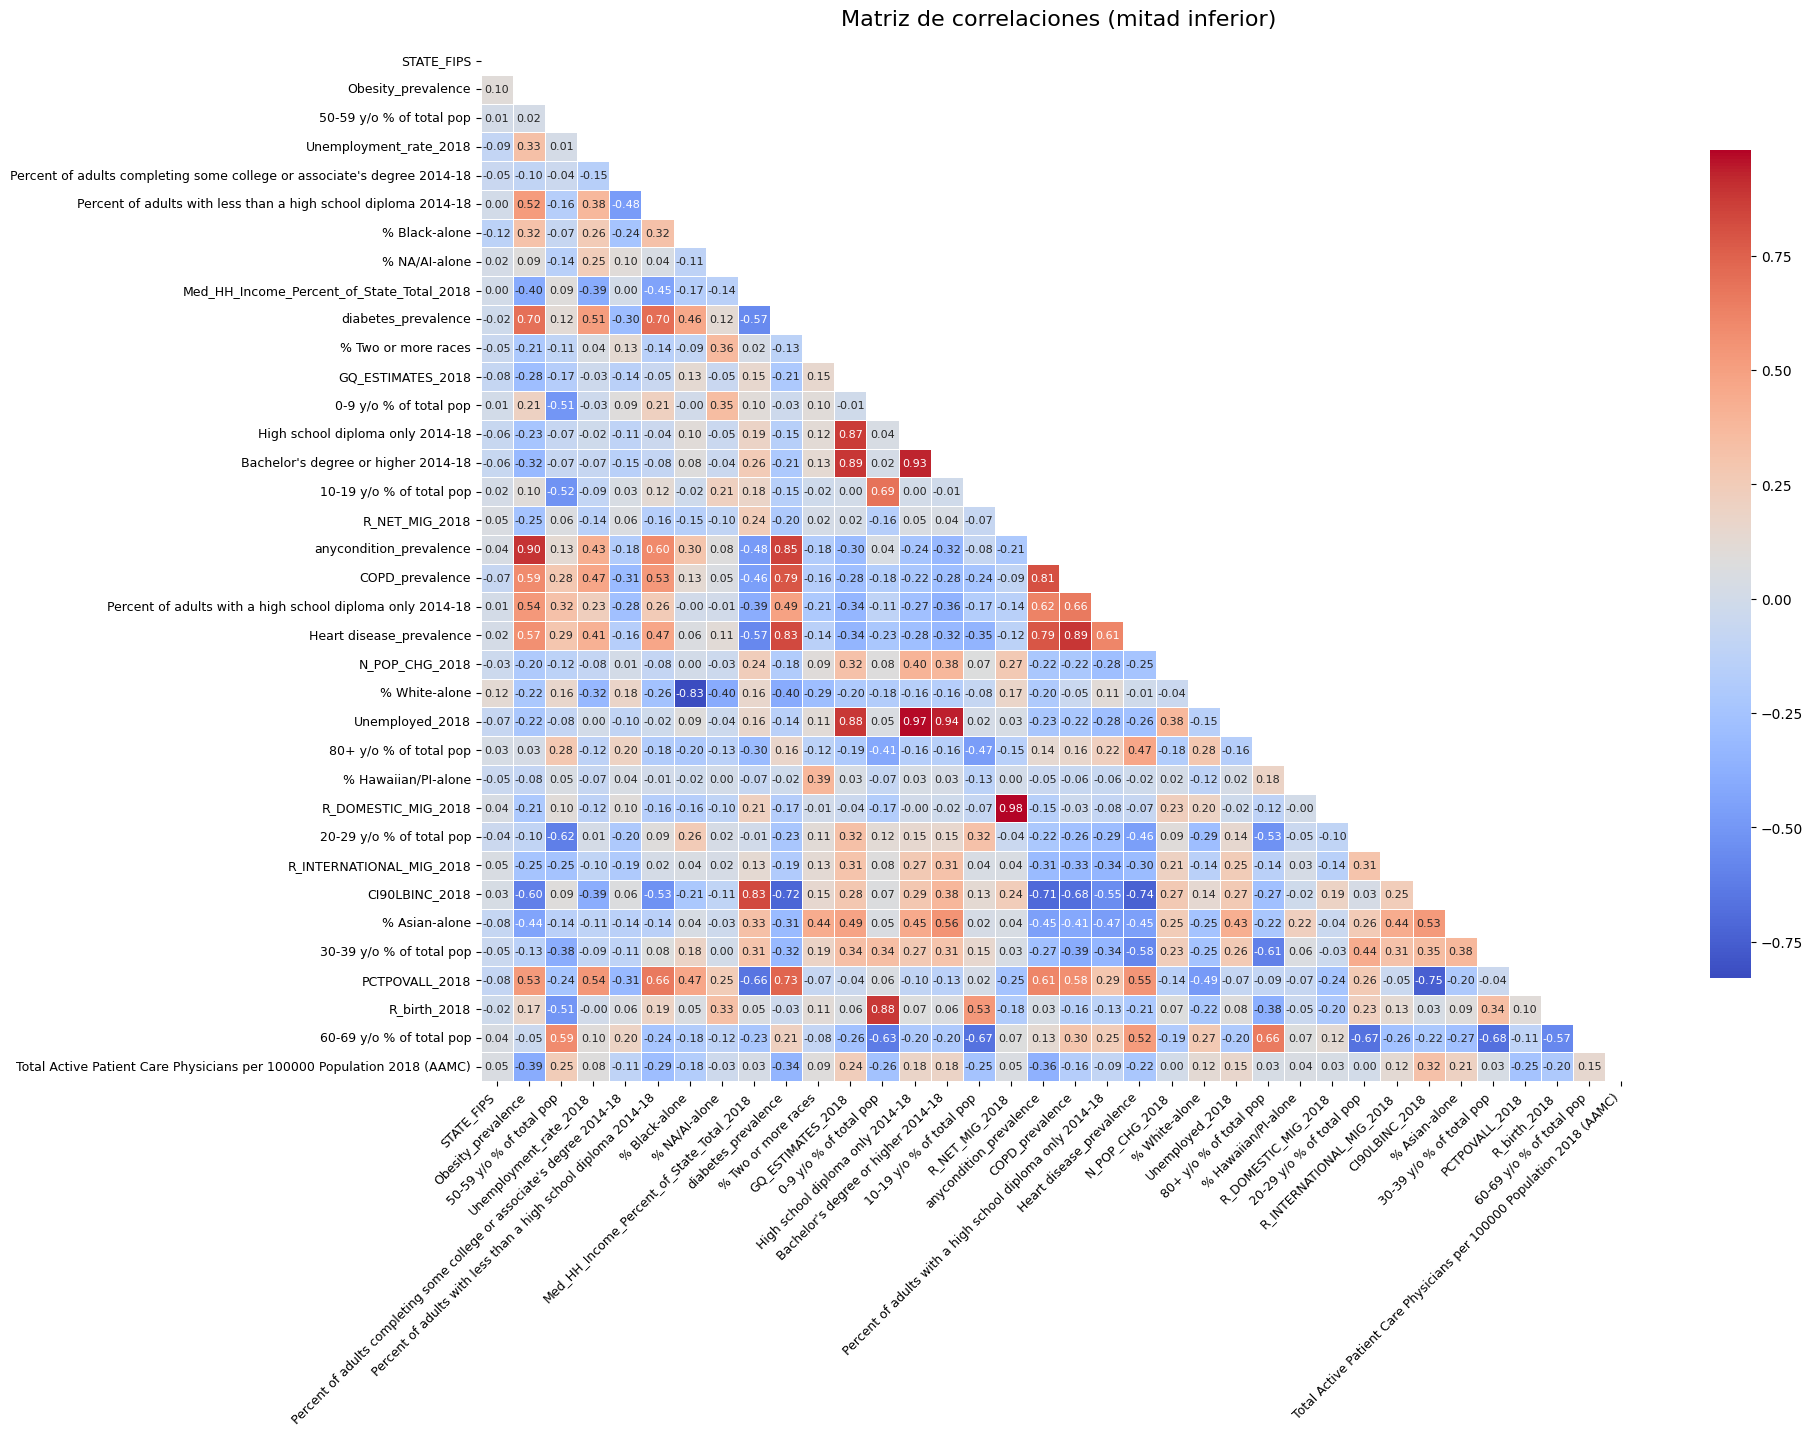

In [78]:
X_copy = X_train[features].copy()
X_copy[target] = y_train
corr = X_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr, mask=mask, cmap='coolwarm',
    annot=True, fmt=".2f", linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 8}
)
plt.title("Matriz de correlaciones (mitad inferior)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

In [79]:
# Selecciona la caracteristicas con las que hemos determinado que vamos a proseguir el análisis
X_train_sel = X_train[features]
X_test_sel = X_test[features]

In [80]:
X_train_sel.describe().T

,count,mean,std,min,25%,50%,75%,max
STATE_FIPS,2512.0,30.560510,15.027716,1.000000,19.000000,29.000000,46.000000,5.600000e+01
Obesity_prevalence,2512.0,35.009435,4.510230,15.200000,32.400000,35.400000,37.900000,4.990000e+01
50-59 y/o % of total pop,2512.0,13.519299,1.485312,6.102350,12.694544,13.627413,14.430568,2.045455e+01
Unemployment_rate_2018,2512.0,4.124244,1.439077,0.000000,3.100000,3.900000,4.800000,1.420000e+01
Percent of adults completing some college or associate's degree 2014-18,2512.0,30.733002,5.205495,11.400000,27.300000,30.700000,34.200000,5.730000e+01
Percent of adults with less than a high school diploma 2014-18,2512.0,13.367516,6.265205,1.200000,8.800000,12.100000,17.200000,4.850000e+01
% Black-alone,2512.0,9.228534,14.292935,0.000000,0.865385,2.459031,10.699459,8.606976e+01
% NA/AI-alone,2512.0,2.342328,7.615966,0.000000,0.386684,0.642697,1.333519,9.251520e+01
Med_HH_Income_Percent_of_State_Total_2018,2512.0,89.553702,20.192276,0.000000,76.200000,86.900000,99.500000,2.636000e+02
diabetes_prevalence,2512.0,13.041640,2.694751,6.100000,11.200000,12.800000,14.700000,2.530000e+01


# 4.4 Escalado de características

In [81]:
# Escalamos los datos con StandardScaler
scaler = StandardScaler()

# Fit en train, transform en ambos
X_train_sc = scaler.fit_transform(X_train_sel)
X_test_sc = scaler.transform(X_test_sel)

# 5.1 Entrenamos el modelo antes de la regularizacion

In [82]:
# Entrenamos un modelo de regresión lineal sin regularización
m_linear = LinearRegression().fit(X_train_sc, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_linear = m_linear.predict(X_train_sc)
yhat_linear = m_linear.predict(X_test_sc)

In [83]:
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [84]:
get_metrics(yhat_linear, y_test, yhat_train_linear, y_train)

,R2,Median AE,MAPE
Train set,0.585511,12.274955,6.640165
Test set,0.591425,12.655050,6.685273
Diferencia,0.005914,0.380095,0.045108


# 5.2 Regularizacion Lasso

### Análisis de la evolución del R² con diferentes valores de alpha en Lasso

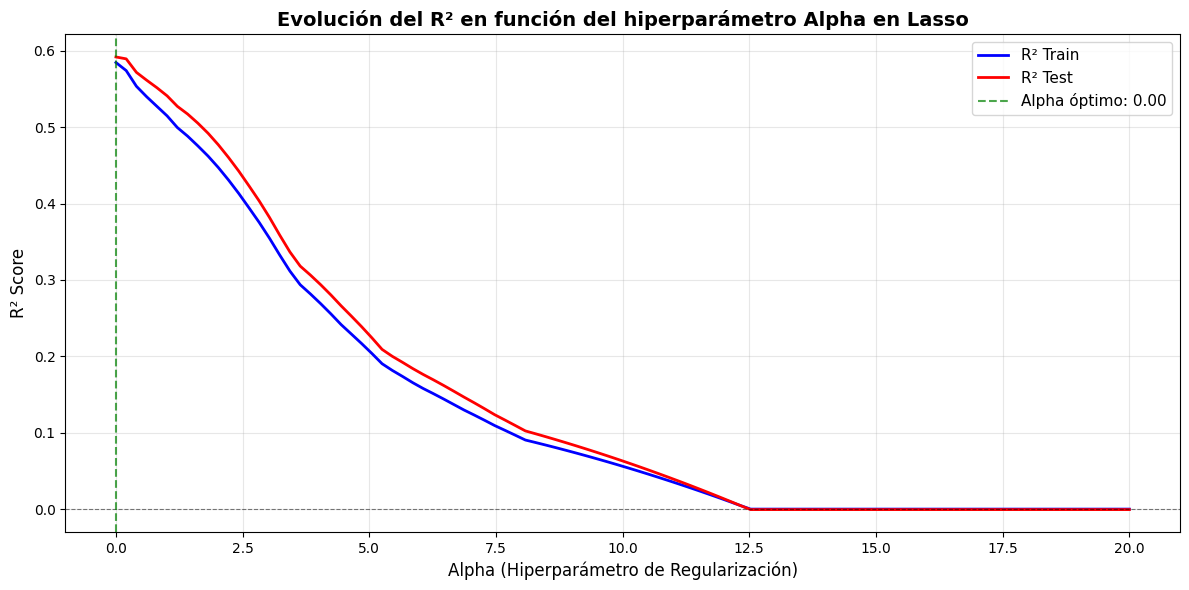


Mejor alpha encontrado: 0.0000
R² máximo en test: 0.591871


In [85]:
# Crear un rango de valores de alpha desde 0.0 hasta 20
alphas = np.linspace(0.0, 20, 100)

# Almacenar los R² para train y test
r2_train_scores = []
r2_test_scores = []

# Entrenar un modelo Lasso para cada valor de alpha
for alpha in alphas:
    # Entrenar el modelo con el alpha actual
    lasso_model = LassoCV(alphas=[alpha], cv=5, random_state=42).fit(X_train_sc, y_train)
    
    # Predecir en train y test
    yhat_train_temp = lasso_model.predict(X_train_sc)
    yhat_test_temp = lasso_model.predict(X_test_sc)
    
    # Calcular R² para train y test
    r2_train_scores.append(r2_score(y_train, yhat_train_temp))
    r2_test_scores.append(r2_score(y_test, yhat_test_temp))

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(alphas, r2_train_scores, label='R² Train', linewidth=2, color='blue')
plt.plot(alphas, r2_test_scores, label='R² Test', linewidth=2, color='red')
plt.xlabel('Alpha (Hiperparámetro de Regularización)', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Evolución del R² en función del hiperparámetro Alpha en Lasso', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

# Encontrar el alpha óptimo (máximo R² en test)
best_alpha_idx = np.argmax(r2_test_scores)
best_alpha = alphas[best_alpha_idx]
best_r2 = r2_test_scores[best_alpha_idx]

plt.axvline(x=best_alpha, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Alpha óptimo: {best_alpha:.2f}')
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nMejor alpha encontrado: {best_alpha:.4f}")
print(f"R² máximo en test: {best_r2:.6f}")

In [86]:
m_lasso = LassoCV(alphas=np.logspace(-6, 6, 10), cv=5, random_state=42, n_jobs=-1).fit(X_train_sc, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_lasso = m_lasso.predict(X_train_sc)
yhat_lasso = m_lasso.predict(X_test_sc)

In [87]:
get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)

,R2,Median AE,MAPE
Train set,0.584544,12.459605,6.642494
Test set,0.592483,12.227740,6.673370
Diferencia,0.007939,-0.231865,0.030876


# 5.3 Regularización Ridge

In [88]:
# Entrenamos un modelo LassoCV
m_ridge = RidgeCV(alphas=np.logspace(-6, 6, 10), cv=5).fit(X_train_sc, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_ridge = m_ridge.predict(X_train_sc)
yhat_ridge = m_ridge.predict(X_test_sc)

In [89]:
print(f'El porcentaje de variables canceladas es: {round(len(m_ridge.coef_[np.abs(m_ridge.coef_)==0])/len(m_ridge.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_ridge.coef_[np.abs(m_ridge.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 0.0%
El modelo utiliza 35 variables.


In [90]:
get_metrics(yhat_ridge, y_test, yhat_train_ridge, y_train)

,R2,Median AE,MAPE
Train set,0.584637,12.390135,6.641011
Test set,0.592095,12.365680,6.674579
Diferencia,0.007459,-0.024455,0.033568


# 7.0 Conclusiones: ¿Existe relación entre datos sociodemográficos y recursos sanitarios?

**SÍ, existe una relación significativa pero parcial.** Los modelos de regresión desarrollados (Linear, Lasso y Ridge) demuestran que los datos sociodemográficos explican aproximadamente el **60% de la variabilidad** (R² ≈ 0.60) en la disponibilidad de médicos por condado, con un error promedio de 11-12 médicos por 100k habitantes. Los factores más relevantes identificados mediante feature importance son: diferencias regionales/estatales, ingresos medios del hogar, nivel educativo, prevalencia de obesidad y composición demográfica. Sin embargo, el **40% restante de variabilidad** no se explica por factores demográficos, dependiendo de elementos como la proximidad a escuelas de medicina, políticas estatales específicas, calidad de vida, infraestructura médica existente y decisiones individuales de los profesionales. Esto indica que, aunque los datos sociodemográficos son útiles para identificar condados en riesgo y realizar análisis de tendencias, deben complementarse con análisis cualitativo y datos institucionales para tomar decisiones de planificación sanitaria precisas.